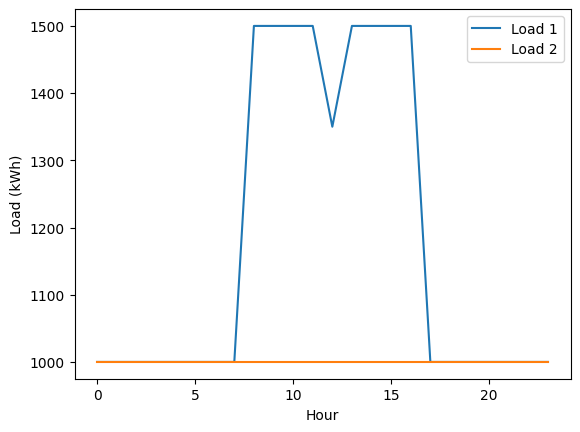

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Create 3 load arrays of 24 hours of data representing the consumption of an industrial plant in kWh for 3 different scenarios

# Load 1: constant load for all days
load1 = np.full(24, 1000)
load1[8:17] += 500
load1[12:13] -= 150
#load1 = load1 + load1 * np.random.rand(24) / 20

# Load 2: constant load plus a peak from 8 to 17
load2 = np.full(24, 1000)
#load2 = load2 * np.random.rand(24) / 20

#.step the 3 loads
plt.figure()
plt.plot(load1, label='Load 1')
plt.plot(load2, label='Load 2')
plt.xlabel('Hour')
plt.ylabel('Load (kWh)')
plt.legend()
plt.show()

In [44]:
load1

array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1500, 1500, 1500,
       1500, 1350, 1500, 1500, 1500, 1500, 1000, 1000, 1000, 1000, 1000,
       1000, 1000])

In [54]:

# Create a dataframe with load 1 for weekdays and load 2 for weekends from 2019 to 2023, on an hourly basis
import pandas as pd
import datetime

# Create a date range from 2019 to 2023
date_range = pd.date_range(start='2019-01-01', end='2023-12-31', freq='H')

# Create a dataframe with the date range
df = pd.DataFrame(index=date_range)

# Create a column with the day of the week
df['day_of_week'] = df.index.dayofweek

# Create a column with the hour of the day
df['hour'] = df.index.hour

#add for a day either the load profile 1 or 2, depending on if it is a weekday or weekend
df['load'] = np.where(df['day_of_week'] < 5, load1[df['hour']], load2[df['hour']])

df['load'] = df['load'] + df['load'] * np.random.rand(len(df['load'])) / 20

#make column out of index
df.reset_index(inplace=True)
df.rename(columns={'index':'date'}, inplace=True)

#save as csv
df.to_csv('../industrial_load.csv', index=False)

